In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:

df = pd.read_csv('Customers.csv')


print(df.describe())

print(df.columns)

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

In [28]:
#clean data

df = df.rename(columns={'Annual Income ($)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})


Data has 8 columns which are CustomerID, Gender, Age, Annual Income ($), Spending score, Profession, Work Experience, and lastly Family Size.

Let us first find the age distribution of customers

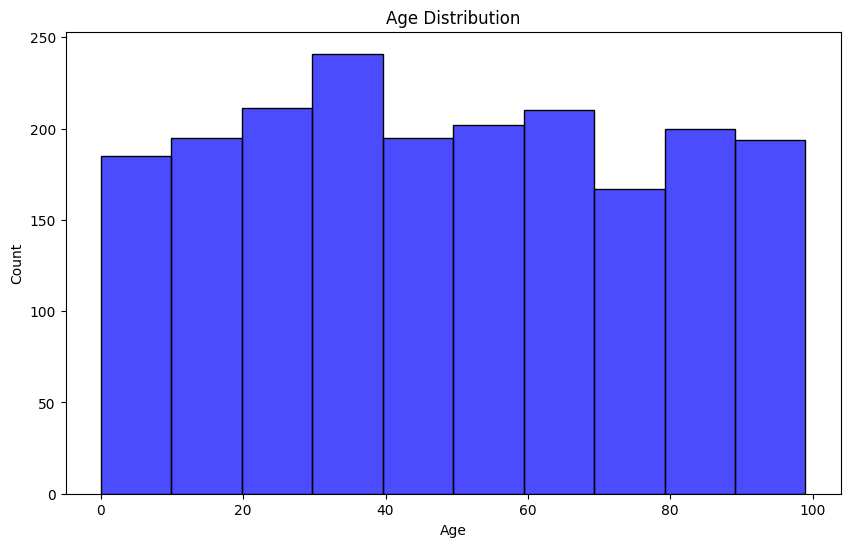

In [29]:
age_dist = df['Age'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Find the gender distribution

<Axes: xlabel='Gender', ylabel='count'>

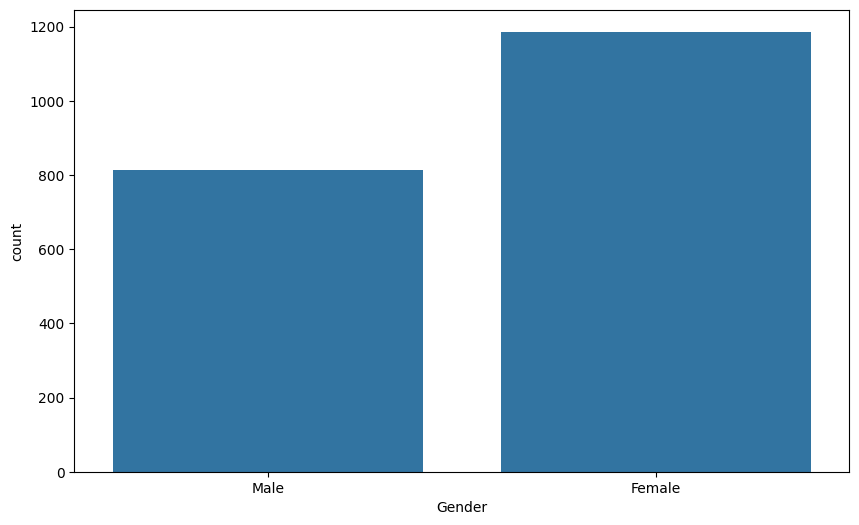

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=df)

Highest annual income by gender

In [32]:
highest_annual_income_gender = df.groupby('Gender').agg({'Annual_Income': "max"})
highest_annual_income_gender

,Annual_Income
Gender,
Female,189974
Male,189945


Highest annual income by profession

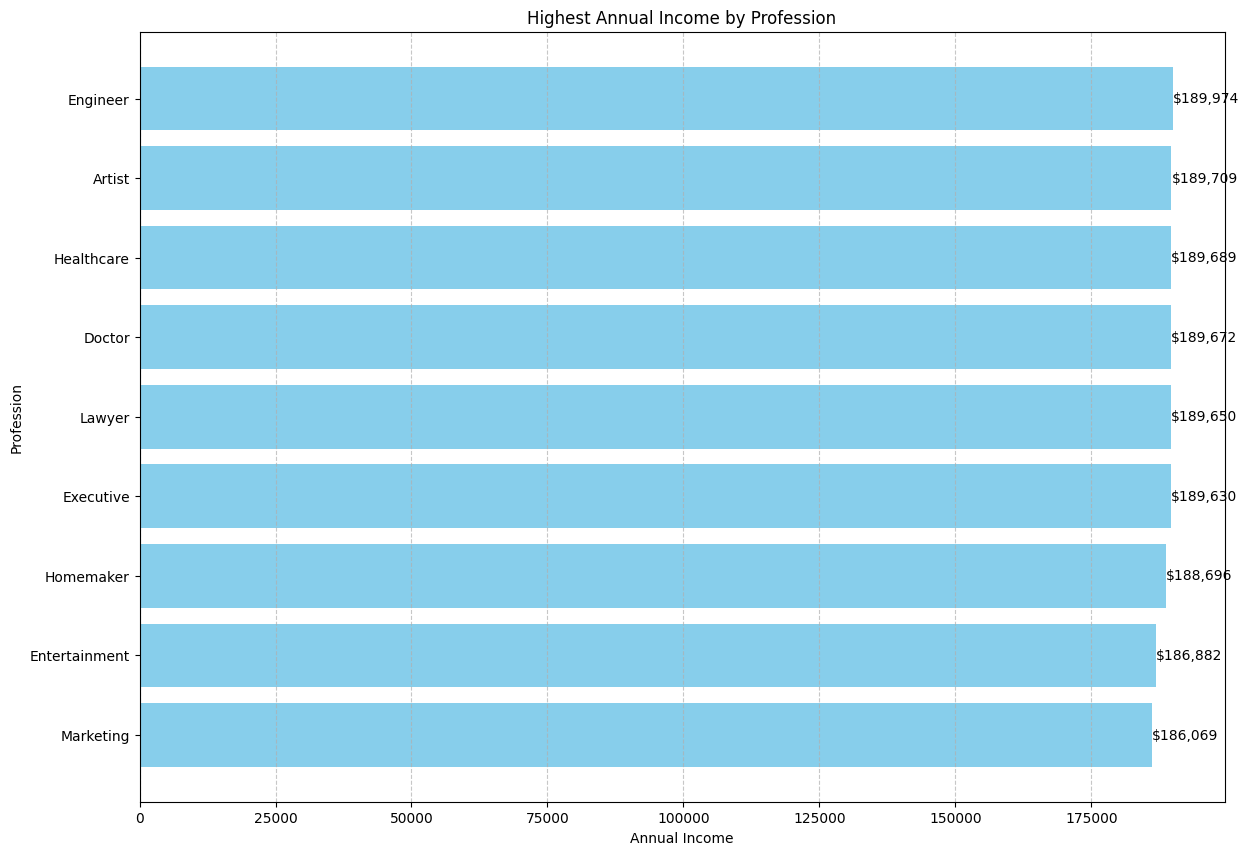

In [43]:

highest_annual_income_profession = df.groupby('Profession').agg({'Annual_Income': 'max'})

highest_annual_income_profession = highest_annual_income_profession.sort_values(by='Annual_Income', ascending=True)

plt.figure(figsize=(14, 10))
bars = plt.barh(highest_annual_income_profession.index, highest_annual_income_profession['Annual_Income'], color='skyblue')
plt.xlabel('Annual Income')
plt.ylabel('Profession')
plt.title('Highest Annual Income by Profession')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${bar.get_width():,.0f}', va='center', ha='left', fontsize=10, color='black')

plt.show()


Highest paid profession by gender

<Axes: xlabel='Profession', ylabel='count'>

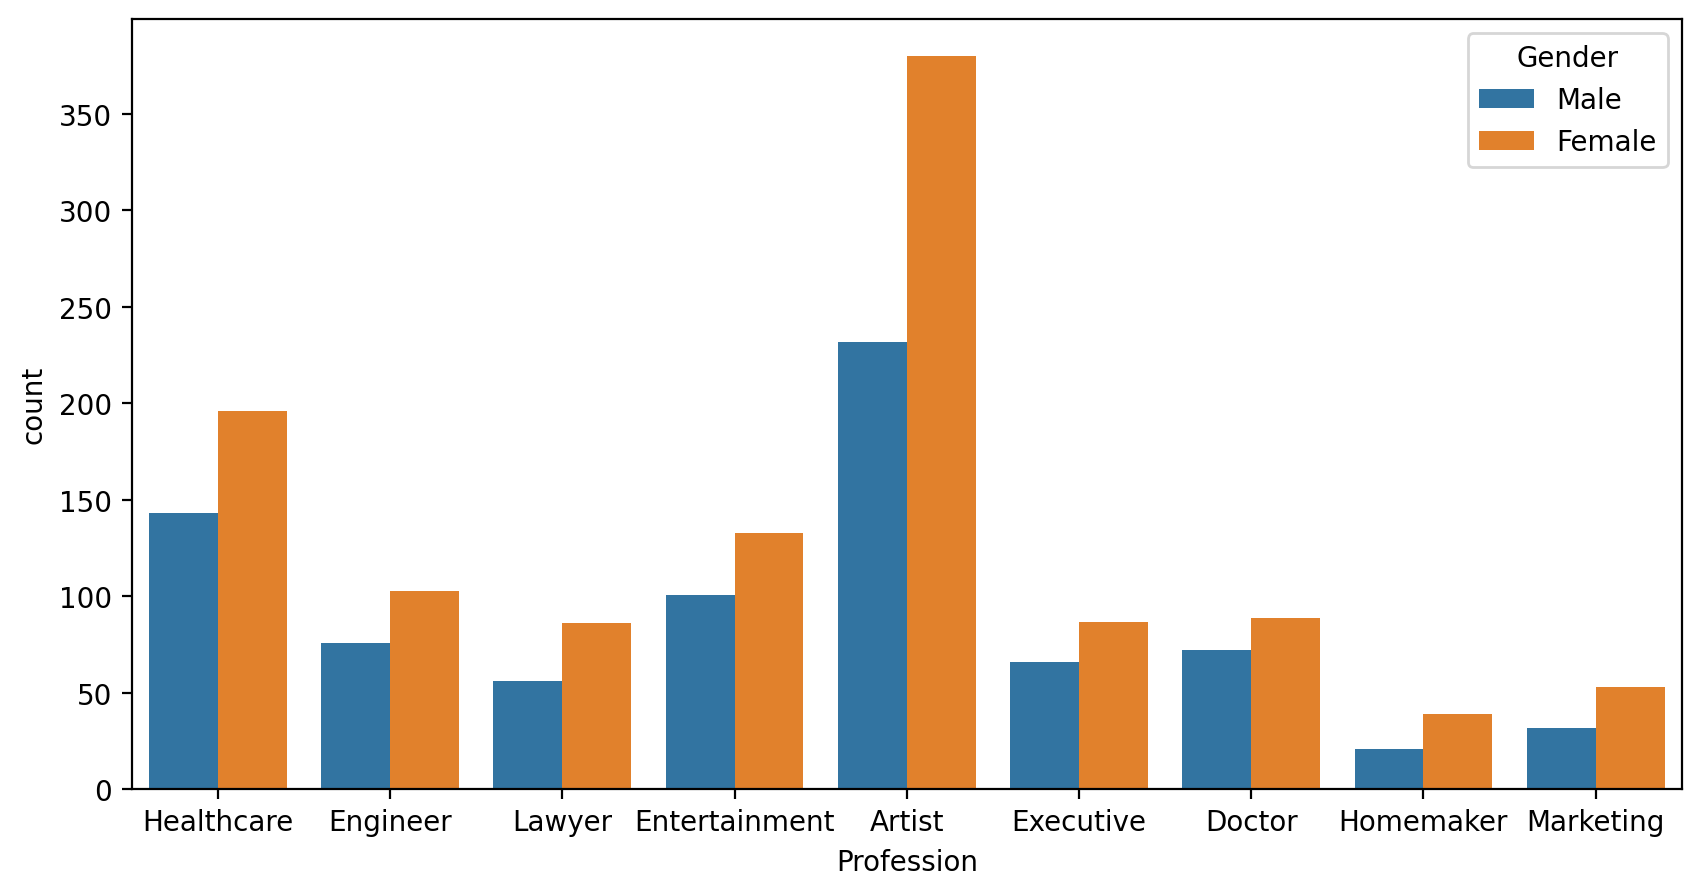

In [49]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(data = df,x="Profession",hue="Gender")